# Problem Session 3

In this problem session we practice our skills with :

* Exploratory Data Analysis
* Simple linear regression
* Multiple linear regression
* kFold cross validation

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### 1. Introducing the data

In this notebook you will work with a data set on vehicle prices found on Kaggle.com, <a href="https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho">https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho</a>.

These data provide the selling price of vehicles as well as various features that may or may not be related to those selling prices.

##### a. 

First load the data for this problem. It is stored in the file `car_sales.csv` in the `Data` folder of the repository. After loading the data look at the first five rows of the dataset. Then run `cars.info()`, are there any missing values?

##### Sample Solution

In [2]:
cars = pd.read_csv("../../data/car_sales.csv")

In [3]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8127 non-null   float64
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 825.6+ KB


Yes, `mileage`, `engine`, `max_power`, `torque` and `seats` are all missing values.

##### b.

Take a second to read through the descriptions for each of the columns of the data set.

- `name`: the name of the vehicle that was sold
- `year`: the year that the vehicle was made
- `selling_price`: the price of the vehicle when it was sold, what we want to predict
- `km_driven`: the number of kilometers the vehicle had driven by the time it was sold
- `fuel`: what kind of fuel the vehicle takes
- `seller_type`: the kind of entity selling the vehicle
- `transmission`: the kind of transmission in the vehicle
- `owner`: how many owners has this vehicle had
- `mileage`: how many kilometers per liter the vehicle is expected to get <i>Note the edit from "hour" to "liter", "hour" was a typo</i>
- `engine`: size of the engine in cubic centimeters
- `max_power`: the maximum horsepower of the vehicle
- `torque`: the torque of the vehicle
- `seats`: the number of seats in the vehicle

##### c.

Come up with two use cases for this data set. Try to make one fit more with an explanatory modeling perspective and the other with a predictive modeling perspective.

##### Sample Solution

- Explanatory modeling: You work for a financial journal outlet and you want to better understand what factors most impact the sale price of vehicular transactions.
- Predictive modeling: You want to build an app that will help consumers or dealers predict the sale price for a given vehicle.

##### d. 

There are future lecture notebooks that cover ways to <i>impute</i> missing values, but for this notebook you will simply remove the missing values. 

Use `dropna`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html</a> to get a version of the data set that has had the missing values removed.

##### Sample Solution

In [5]:
## alternatively cars.dropna(inplace=True)
cars = cars.dropna()

##### e.

Looking at the first five rows you can notice that the columns `mileage`, `engine` and `max_power` represent numeric variables, but currently contain text. Before doing any modeling you will have to clean the data a little bit.

Using `.apply`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html</a>, and the function `clean_column` below clean up the `mileage`, `engine` and `max_power` columns. The end results should be purely numeric versions of those columns.

We should also transform `year` slightly. These data were uploaded in 2020, meaning we can use 2020 as a reference year to calculate the age of the car at the moment it was sold. Create a new column called `age` that calculates the age of the car using 2020 as the reference year.

In [6]:
def clean_column(text):
    return float(text.split()[0])

##### Sample Solution

In [7]:
cars['mileage'] = cars['mileage'].apply(clean_column)
cars['engine'] = cars['engine'].apply(clean_column)
cars['max_power'] = cars['max_power'].apply(clean_column)
cars['age'] = 2020 - cars['year']

### Predictive Model

In the next couple of problem session notebooks you will build a series of models to predict the sale price of a given vehicle. In this notebook we will work on models that take in a single feature and use multiple features in a later notebook.

#### 2. Train test split

The first step in predictive modeling is performing a train test split. Perform a train test split on these data, setting aside $20\%$ of the data as a test set. Choose a `random_state` so your results are reproducible.

As a refresher you can use `sklearn`'s `train_test_split` function, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</a>.

##### Sample Solution

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
cars_train, cars_test = train_test_split(cars.copy(),
                                            test_size=.2,
                                            random_state=440,
                                            shuffle=True)

#### 3. Exploratory data analysis (EDA)

After the train test split we can work on some exploratory data analysis. Here is where we start to look at the data and see if we can generate any modeling ideas or hypotheses. You will make a series of plots and learn a modeling trick that should improve any models we make.

##### a.

Fill in the code below to make histograms of `selling_price` and `km_driven` using the training data.

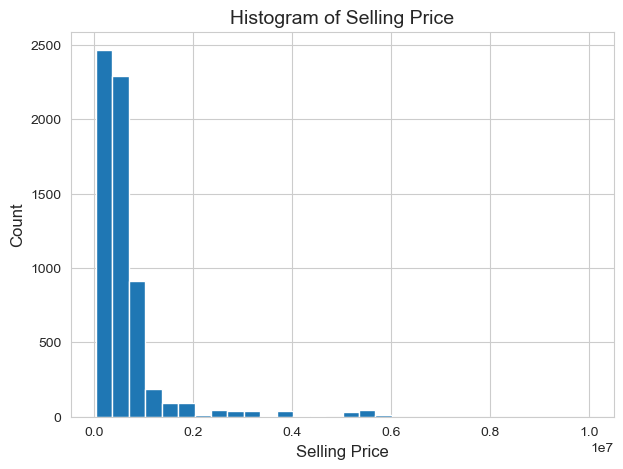

In [10]:
plt.figure(figsize=(7,5))

plt.hist(cars_train.selling_price, bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel("Count", fontsize=12)
plt.xlabel("Selling Price", fontsize=12)

plt.title("Histogram of Selling Price", fontsize=14)

plt.show()

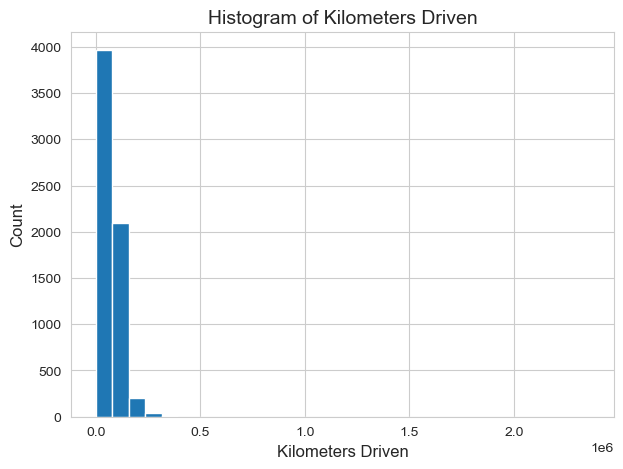

In [11]:
plt.figure(figsize=(7,5))

plt.hist(cars_train.km_driven, bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.ylabel("Count", fontsize=12)
plt.xlabel("Kilometers Driven", fontsize=12)

plt.title("Histogram of Kilometers Driven", fontsize=14)

plt.show()

##### b. 

Now use `seaborn`'s `pairplot`, <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">https://seaborn.pydata.org/generated/seaborn.pairplot.html</a> to plot `selling_price` against `km_driven`, `mileage` and `age`. Shell code is provided for you below.

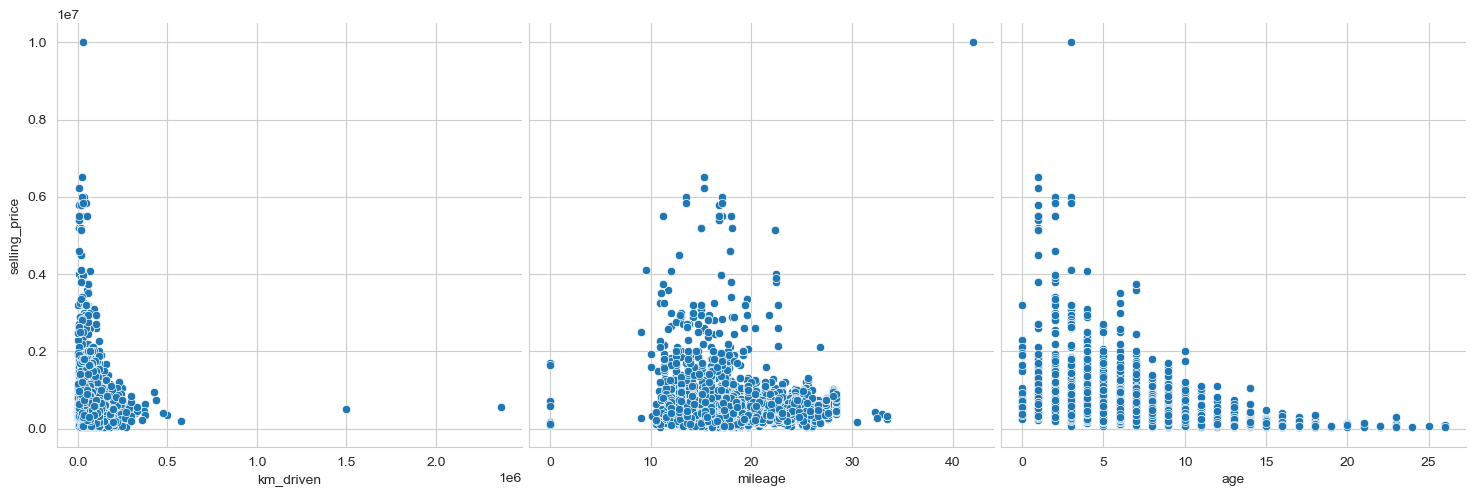

In [12]:
sns.pairplot(cars_train,
                y_vars = ['selling_price'],
                x_vars = ['km_driven', 'mileage', 'age'],
                height = 5)

plt.show()

##### c.

Do any of the previous relationships look linear? 

##### Sample Solution

Not really. It's doubtful that linear regression would be a good model here.

##### d.

Now you will learn a common trick in regression. Even if there is no direct linear relationship, we may still obtain a linear relationship between *transformed* versions of our variables.  When your distribution is highly skewed it can be useful to perform a $\log$ transformation on the data.

Make new columns in your training set that take the base 10 $\log$ of `selling_price` and `km_driven`, then remake the `pairplot` replacing `selling_price` and `km_driven` with these newly transformed columns.

<i>Hint: <a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html">https://numpy.org/doc/stable/reference/generated/numpy.log10.html</a></i>

##### Sample Solution

In [13]:
cars_train['log_sell'] = np.log10(cars_train['selling_price'])
cars_train['log_km'] = np.log10(cars_train['km_driven'])

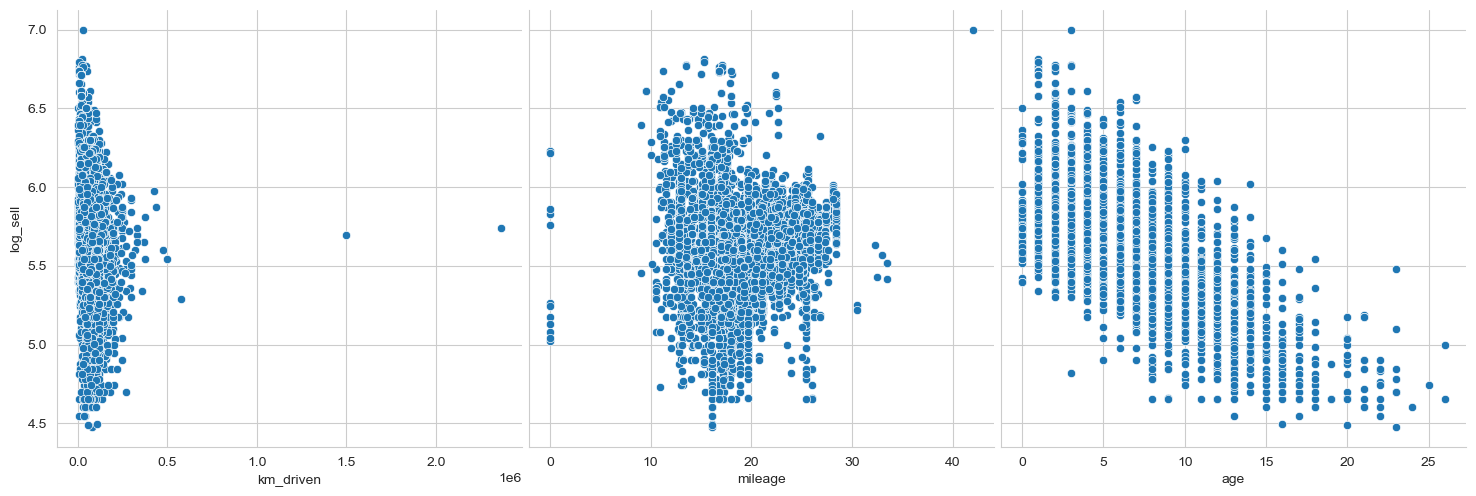

In [14]:
sns.pairplot(cars_train,
                y_vars = ['log_sell'],
                x_vars = ['km_driven', 'mileage', 'age'],
                height = 5)


plt.show()

##### e.

Another part of EDA is calculating descriptive statistics.

One statistic of interest to us in this situation is the <i>Pearson correlation coefficient</i>. For two variables $x$ and $y$ with $n$ observations each, the Pearson correlation is given by:

$$
r = \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right) \left( y_i - \overline{y}  \right)}{\sqrt{\sum_{i=1}^n \left(x_i - \overline{x}\right)^2 \sum_{i=1}^n \left(y_i - \overline{y} \right)^2}} = \frac{\text{cov}\left(x, y\right)}{\sigma_x \sigma_y},
$$

where $x_i$ is the $i^\text{th}$ observation, $\overline{x} = \sum_{i=1}^n x_i/n$, $\text{cov}\left( x, y \right)$ is the covariance between $x$ and $y$, and $\sigma_x$ denotes the standard deviation of $x$.

$r \in [-1,1]$ gives a sense of the strength of the linear relationship between $x$ and $y$. The closer $|r|$ is to $1$, the stronger the linear relationship between $x$ and $y$, the sign of $r$ determines the direction of the relationship, with $r < 0$ meaning a line with a negative slope and $r > 0$ a line with a positive slope.

Calculate the correlation between `log_sell` and the columns you have previously plotted.

<i>Hint: Either <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html</a> or <a href="https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html">https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html</a> should work.</i>.

##### Sample Solution

In [15]:
cars_train[['log_sell', 'log_km', 'mileage', 'age']].corr()

,log_sell,log_km,mileage,age
log_sell,1.000000,-0.362105,-0.037412,-0.699555
log_km,-0.362105,1.000000,-0.124318,0.538306
mileage,-0.037412,-0.124318,1.000000,-0.330155
age,-0.699555,0.538306,-0.330155,1.000000


##### f.

Based on your EDA, which feature do you think would best predict `log_sell` in a simple linear regression model?

##### Sample Solution

`age`.

#### 4. Modeling

Now you will build some preliminary models for this data set.

##### a.

When doing predictive modeling it is good practice to have a <i>baseline model</i> which is a simple "model" solely for comparison purposes. These are not, typically, complex or good models, but they are important reference points to give us a sense of how well our models are actually performing.

A standard regression model baseline is to just predict the average value of $y$ for any value of $X$. In this setting that model looks like this:

$$
\text{Baseline Model: } \ \ \ \ \log\left(\text{Selling Price}\right) = E(\log\left(\text{Selling Price}\right)) + \epsilon,
$$

where $\epsilon$ is some random noise.

Write some code to estimate $E(\log\left(\text{Selling Price}\right))$ using the training set.

##### Sample Solution

In [16]:
cars_train.log_sell.mean()

5.645309905778108

##### b.

Below you will use cross-validation to compare these 3 simple linear regression models, 1 multiple linear regression model,  and the baseline model from above:

$$
\text{Model 0 (Baseline)}: \ \log\left(\text{Selling Price}\right) = E(\log\left(\text{Selling Price}\right)) + \epsilon,
$$

$$
\text{Model 1}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \log\left( \text{Kilometers Driven} \right) + \epsilon
$$

$$
\text{Model 2}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Mileage} + \epsilon
$$

$$
\text{Model 3}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

$$
\text{Model 4}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Mileage}  + \beta_2 \text{Age} + \epsilon
$$

In this problem practice fitting just one of these three models using the training set and `sklearn`'s `LinearRegression` model, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

##### Sample Solution

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression(copy_X = True)

reg.fit(cars_train.log_km.values.reshape(-1,1),
           cars_train.log_sell.values)

LinearRegression()

In [19]:
reg.intercept_

7.271273897258017

In [20]:
reg.coef_

array([-0.34487744])

##### c.

In this problem you will try to implement $5$-fold cross-validation (CV) to compare these three models and the baseline model to see which one has the lowest average cross-validation mean squared error (MSE).

Because this may be your first time implementing CV, some of the code will be filled in for you.

##### Sample Solution

In [21]:
## import KFold here
from sklearn.model_selection import KFold

## import mean_squared_error
from sklearn.metrics import mean_squared_error

In [22]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(5,
              random_state = 614,
              shuffle=True)




## This array will hold the mse for each model and split
mses = np.zeros((5, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):
    ## cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = cars_tt.log_sell.mean()*np.ones(len(cars_ho))
    
    mses[0, i] = mean_squared_error(cars_ho.log_sell, baseline_pred)
    
    ## Fit and get ho mse for model 1
    slr = LinearRegression(copy_X = True)
    
    slr.fit(cars_tt.log_km.values.reshape(-1,1),
               cars_tt.log_sell.values)
    
    mses[1, i] = mean_squared_error(cars_ho.log_sell, slr.predict(cars_ho.log_km.values.reshape(-1,1)))
    
    
    ## Fit and get ho mse for model 2
    slr = LinearRegression(copy_X = True)
    
    slr.fit(cars_tt.mileage.values.reshape(-1,1),
               cars_tt.log_sell.values)
    
    mses[2, i] = mean_squared_error(cars_ho.log_sell, slr.predict(cars_ho.mileage.values.reshape(-1,1)))
    
    
    ## Fit and get ho mse for model 3
    slr = LinearRegression(copy_X = True)
    
    slr.fit(cars_tt.age.values.reshape(-1,1),
               cars_tt.log_sell.values)
    
    mses[3, i] = mean_squared_error(cars_ho.log_sell, slr.predict(cars_ho.age.values.reshape(-1,1)))

    ## Fit and get ho mse for model 4
    slr = LinearRegression(copy_X = True)
    
    slr.fit(cars_tt[['mileage','age']],
               cars_tt.log_sell.values)
    
    mses[4, i] = mean_squared_error(cars_ho.log_sell, slr.predict(cars_ho[['mileage','age']]))
    
    
    
    i = i + 1

In [23]:
## Find the avg cv mse for each model here
print("Baseline Avg. CV MSE:", np.mean(mses[0,:]))
print("Model 1 Avg. CV MSE:", np.mean(mses[1,:]))
print("Model 2 Avg. CV MSE:", np.mean(mses[2,:]))
print("Model 3 Avg. CV MSE:", np.mean(mses[3,:]))
print("Model 3 Avg. CV MSE:", np.mean(mses[4,:]))

Baseline Avg. CV MSE: 0.12892091037266837
Model 1 Avg. CV MSE: 0.11205366962516325
Model 2 Avg. CV MSE: 0.12879801304265986
Model 3 Avg. CV MSE: 0.0658582472737147
Model 3 Avg. CV MSE: 0.05545341606868078


##### d.

Which model had the lowest average cross validation mean squared error?

##### Sample Solution

Model 3.

That's it for this notebook. In the next couple of regression based notebooks we will build additional models for this data set.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)